In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import sys
sys.path.append('..')
from utils.read_utils import load_dataset, load_dataset_7, load_indicators5, load_horizons
from utils.plot_utils import print_score, inverse_transform, plot_prediction
from algorithms.model import lstm_train, svr_train, score

2022-04-08 05:27:49.903172: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Import the dataset
X_train, X_test, y_train, y_test = load_dataset()
X_train_7, X_test_7, y_train_7, y_test_7 = load_dataset_7()
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train_7.shape, X_test_7.shape, y_train_7.shape, y_test_7.shape

((79002, 27), (19800, 27), (79002, 3), (19800, 3))

In [3]:
X_train.head()

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,44.272499,0.279049,0.070511,0.208537,49.448601,86.786413,79.241559,63.933113,...,10.904313,258.996478,17.345854,241.650624,-3.884604,-0.285202,-3.599402,-0.013031,0.008353,-0.021384
2018-01-16,AAPL,Information Technology,44.047501,0.299277,0.072592,0.226685,56.387717,84.778499,83.724224,60.286756,...,11.585355,272.713460,17.166527,255.546933,-4.130166,-0.378979,-3.751187,-0.015600,0.003290,-0.018891
2018-01-17,AAPL,Information Technology,44.775002,0.369749,0.114451,0.255298,66.314712,87.455489,86.340133,66.866883,...,12.413647,277.316124,17.415353,259.900771,-4.286488,-0.428241,-3.858247,-0.016080,0.002249,-0.018328
2018-01-18,AAPL,Information Technology,44.814999,0.423939,0.134913,0.289026,73.389883,85.987594,86.073860,67.188769,...,13.294427,279.748077,15.877844,263.870232,-4.427213,-0.455173,-3.972040,-0.012283,0.004836,-0.017119
2018-01-19,AAPL,Information Technology,44.615002,0.445611,0.125267,0.320343,65.569700,91.451444,88.298176,63.848590,...,14.161947,283.602023,15.785433,267.816591,-4.534870,-0.450263,-4.084606,-0.008371,0.006999,-0.015370


In [4]:
y_train.head()

,Symbol,Sector,Close_after_1_day
2018-01-12,AAPL,Information Technology,44.047501
2018-01-16,AAPL,Information Technology,44.775002
2018-01-17,AAPL,Information Technology,44.814999
2018-01-18,AAPL,Information Technology,44.615002
2018-01-19,AAPL,Information Technology,44.250000


In [5]:
# Import indicators and horizons
all_indicators, combined_indicators1, combined_indicators2, combined_indicators3, combined_indicators4, combined_indicators5 = load_indicators5()
horizons, horizons_7 = load_horizons()

# For one company

In [6]:
X_train_one = X_train.loc[X_train['Symbol'] == "AAPL"].copy()
X_test_one = X_test.loc[X_test['Symbol'] == "AAPL"].copy()
y_train_one = y_train.loc[y_train['Symbol'] == "AAPL"].copy()
y_test_one = y_test.loc[y_test['Symbol'] == "AAPL"].copy()
X_train_one.shape, X_test_one.shape, y_train_one.shape, y_test_one.shape

((798, 27), (200, 27), (798, 3), (200, 3))

In [7]:
# Normalizing the data set 
X_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler.fit_transform(X_train_one[all_indicators])
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler.fit_transform(y_train_one.loc[: ,horizons])
X_scaler

MinMaxScaler()

In [8]:
X_train_one[all_indicators] = X_scaler.transform(X_train_one[all_indicators])
X_test_one[all_indicators] = X_scaler.transform(X_test_one[all_indicators])
X_train_one.head()

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,0.081078,0.406031,0.636571,0.375093,0.432087,0.879284,0.801173,0.666358,...,0.669363,0.774377,0.760467,0.753250,0.197569,0.253106,0.219259,0.264167,0.470645,0.196512
2018-01-16,AAPL,Information Technology,0.078987,0.407692,0.637084,0.376789,0.532264,0.858802,0.848522,0.609731,...,0.673898,0.788947,0.759739,0.768959,0.172437,0.215096,0.201836,0.247962,0.395169,0.213290
2018-01-17,AAPL,Information Technology,0.085747,0.413479,0.647407,0.379463,0.675575,0.886109,0.876153,0.711919,...,0.679414,0.793836,0.760749,0.773881,0.156438,0.195129,0.189547,0.244940,0.379644,0.217073
2018-01-18,AAPL,Information Technology,0.086119,0.417930,0.652453,0.382615,0.777716,0.871136,0.873341,0.716918,...,0.685279,0.796419,0.754510,0.778368,0.142036,0.184213,0.176485,0.268879,0.418213,0.225209
2018-01-19,AAPL,Information Technology,0.084261,0.419709,0.650074,0.385542,0.664819,0.926870,0.896835,0.665046,...,0.691056,0.800513,0.754135,0.782829,0.131017,0.186203,0.163563,0.293547,0.450448,0.236982


In [9]:
y_train_one.loc[: ,horizons] = y_scaler.transform(y_train_one.loc[: ,horizons])
y_test_one.loc[: ,horizons] = y_scaler.transform(y_test_one.loc[: ,horizons])
y_test_one.tail()

,Symbol,Sector,Close_after_1_day
2021-12-22,AAPL,Information Technology,1.307771
2021-12-23,AAPL,Information Technology,1.345406
2021-12-27,AAPL,Information Technology,1.335742
2021-12-28,AAPL,Information Technology,1.336578
2021-12-29,AAPL,Information Technology,1.325613


2022-04-08 05:27:53.423167: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-08 05:27:53.424299: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-08 05:27:53.497021: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3d:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-08 05:27:53.497074: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-08 05:27:53.499545: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-08 05:27:53.499654: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.

Epoch 1/20


2022-04-08 05:27:58.692178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-08 05:27:59.541111: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-04-08 05:27:59.574001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


 7/24 [=======>......................] - ETA: 0s - loss: 0.2445  

2022-04-08 05:28:01.820623: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


24/24 [==============================] - 7s 10ms/step - loss: 0.1400
Epoch 2/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 3/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 4/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 5/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 6/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 7/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 8/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 9/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 10/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 11/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 12/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 13/20
24/24 [=============================

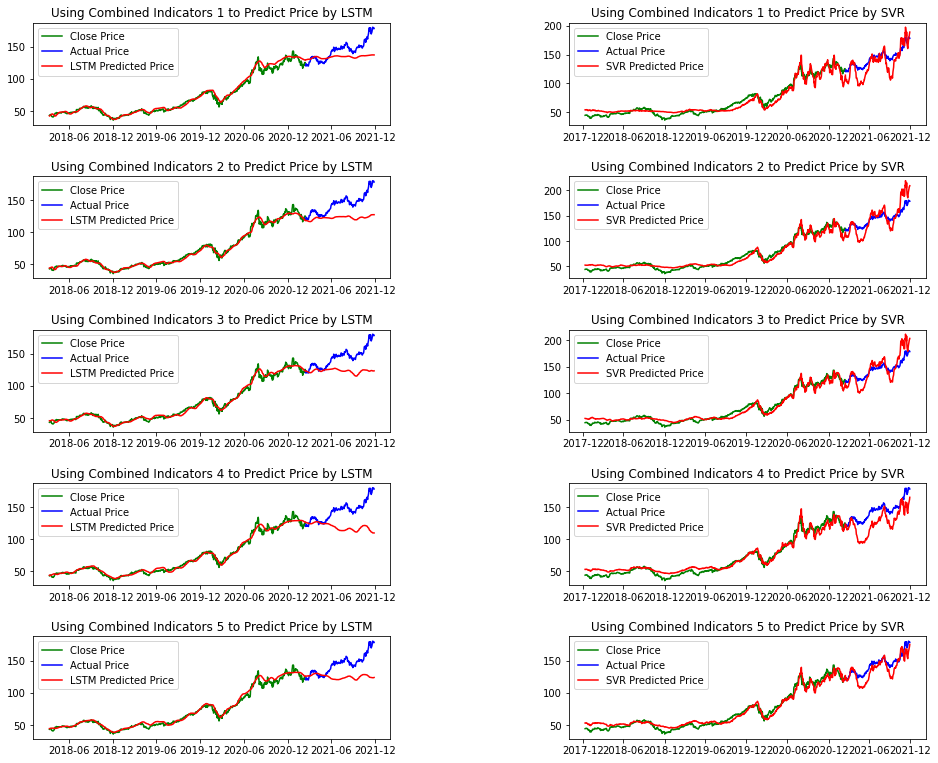

In [10]:
preds_train = []
preds_test = []
rmse_lstm = []
rmse_svr = []
plt.figure(figsize=(16,16))

preds_train, preds_test = lstm_train(combined_indicators1, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_lstm.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,3)
plot_prediction("Combined Indicators 1", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(combined_indicators1, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_svr.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,4)
plot_prediction("Combined Indicators 1", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

preds_train, preds_test = lstm_train(combined_indicators2, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_lstm.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,5)
plot_prediction("Combined Indicators 2", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(combined_indicators2, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_svr.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,6)
plot_prediction("Combined Indicators 2", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

preds_train, preds_test = lstm_train(combined_indicators3, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_lstm.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,7)
plot_prediction("Combined Indicators 3", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(combined_indicators3, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_svr.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,8)
plot_prediction("Combined Indicators 3", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

preds_train, preds_test = lstm_train(combined_indicators4, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_lstm.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,9)
plot_prediction("Combined Indicators 4", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(combined_indicators4, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_svr.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,10)
plot_prediction("Combined Indicators 4", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

preds_train, preds_test = lstm_train(combined_indicators5, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_lstm.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,11)
plot_prediction("Combined Indicators 5", horizons, "LSTM", y_scaler, y_train_one.iloc[59:], y_test_one, preds_train, preds_test)

preds_train, preds_test = svr_train(combined_indicators5, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
rmse_svr.append(score(horizons, y_test_one, preds_test))
plt.subplot(6,2,12)
plot_prediction("Combined Indicators 5", horizons, "SVR", y_scaler, y_train_one, y_test_one, preds_train, preds_test)

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=.5,hspace=.5)

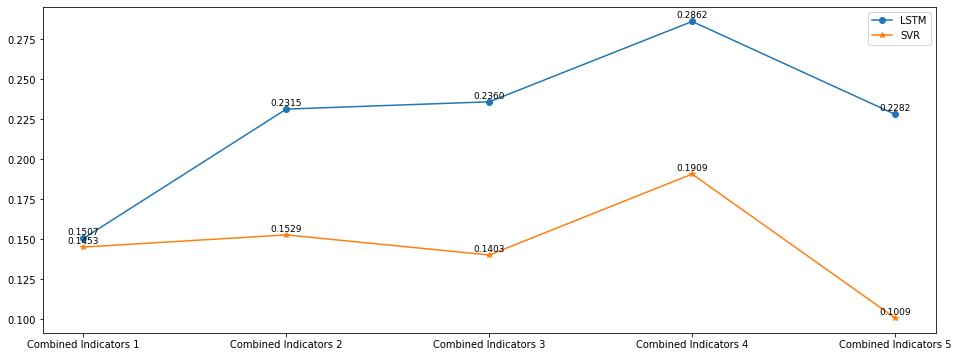

In [11]:
plt.figure(figsize=(16, 6))
xticks = ['Combined Indicators 1', 'Combined Indicators 2', 'Combined Indicators 3', 'Combined Indicators 4', 'Combined Indicators 5']
plt.plot(xticks, rmse_lstm, marker='o', label="LSTM")
plt.plot(xticks, rmse_svr, marker='*', label="SVR")
for a,b in zip(range(len(rmse_lstm)),rmse_lstm):
    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
for a,b in zip(range(len(rmse_svr)),rmse_svr):
    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
plt.legend()
plt.show()

# For all conpanies

In [13]:
# Normalizing the data set 
X_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler.fit_transform(X_train[combined_indicators])
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler.fit_transform(y_train.loc[: ,horizons])
X_scaler_7 = MinMaxScaler(feature_range=(0, 1))
X_scaler_7.fit_transform(X_test_7[combined_indicators])
y_scaler_7 = MinMaxScaler(feature_range=(0, 1))
y_scaler_7.fit_transform(y_test_7.loc[: ,horizons_7])

array([[0.02922732],
       [0.03014126],
       [0.02991277],
       ...,
       [0.0135559 ],
       [0.01341075],
       [0.01331398]])

In [14]:
X_train[combined_indicators] = X_scaler.transform(X_train[combined_indicators])
X_test[combined_indicators] = X_scaler.transform(X_test[combined_indicators])
X_train_7[combined_indicators] = X_scaler_7.transform(X_train_7[combined_indicators])
X_test_7[combined_indicators] = X_scaler_7.transform(X_test_7[combined_indicators])
X_train.head()

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,0.011414,0.521489,0.497368,0.522757,0.494486,0.870397,0.799826,0.644859,...,0.669363,0.774377,0.760467,0.753250,0.197569,0.253106,0.219259,0.264167,0.470645,0.196512
2018-01-16,AAPL,Information Technology,0.011350,0.521548,0.497388,0.522820,0.563877,0.850170,0.845447,0.600396,...,0.673898,0.788947,0.759739,0.768959,0.172437,0.215096,0.201836,0.247962,0.395169,0.213290
2018-01-17,AAPL,Information Technology,0.011557,0.521756,0.497801,0.522918,0.663147,0.877137,0.872069,0.680633,...,0.679414,0.793836,0.760749,0.773881,0.156438,0.195129,0.189547,0.244940,0.379644,0.217073
2018-01-18,AAPL,Information Technology,0.011568,0.521916,0.498003,0.523034,0.733899,0.862350,0.869359,0.684558,...,0.685279,0.796419,0.754510,0.778368,0.142036,0.184213,0.176485,0.268879,0.418213,0.225209
2018-01-19,AAPL,Information Technology,0.011511,0.521980,0.497908,0.523141,0.655697,0.917391,0.891996,0.643829,...,0.691056,0.800513,0.754135,0.782829,0.131017,0.186203,0.163563,0.293547,0.450448,0.236982


In [15]:
y_train.loc[: ,horizons] = y_scaler.transform(y_train.loc[: ,horizons])
y_test.loc[: ,horizons] = y_scaler.transform(y_test.loc[: ,horizons])
y_train_7.loc[: ,horizons_7] = y_scaler_7.transform(y_train_7.loc[: ,horizons_7])
y_test_7.loc[: ,horizons_7] = y_scaler_7.transform(y_test_7.loc[: ,horizons_7])
y_test.tail()

,Symbol,Sector,Close_after_1_day
2021-12-22,XOM,Energy,0.016162
2021-12-23,XOM,Energy,0.016409
2021-12-27,XOM,Energy,0.016352
2021-12-28,XOM,Energy,0.016199
2021-12-29,XOM,Energy,0.016097


In [ ]:
preds_train = []
preds_test = []
rmse_lstm = []
rmse_svr = []
plt.figure(figsize=(16,16))
combined_indicators = [combined_indicators1, combined_indicators2, combined_indicators3, combined_indicators4, combined_indicators5]

for combined_indicator in combined_indicators:
    preds_train, preds_test = lstm_train(combined_indicator, horizons, X_train, y_train, X_test, y_test)
    rmse_lstm.append(score(horizons, y_test, preds_test))

    preds_train, preds_test = svr_train(combined_indicator, horizons, X_train, y_train, X_test, y_test)
    rmse_svr.append(score(horizons, y_test, preds_test))

In [16]:
preds_train = []
preds_test = []
rmse_lstm = []
rmse_svr = []
plt.figure(figsize=(16,16))

preds_train, preds_test = lstm_train(combined_indicators1, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))

preds_train, preds_test = svr_train(combined_indicators1, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))

preds_train, preds_test = lstm_train(combined_indicators2, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))

preds_train, preds_test = svr_train(combined_indicators2, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))

preds_train, preds_test = lstm_train(combined_indicators3, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))

preds_train, preds_test = svr_train(combined_indicators3, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))

preds_train, preds_test = lstm_train(combined_indicators4, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))

preds_train, preds_test = svr_train(combined_indicators4, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))

preds_train, preds_test = lstm_train(combined_indicators5, horizons, X_train, y_train, X_test, y_test)
rmse_lstm.append(score(horizons, y_test, preds_test))

preds_train, preds_test = svr_train(combined_indicators5, horizons, X_train, y_train, X_test, y_test)
rmse_svr.append(score(horizons, y_test, preds_test))

Epoch 1/20
2467/2467 [==============================] - 25s 9ms/step - loss: 5.5334e-04
Epoch 2/20
2467/2467 [==============================] - 22s 9ms/step - loss: 1.9286e-04
Epoch 3/20
2467/2467 [==============================] - 22s 9ms/step - loss: 1.3152e-04
Epoch 4/20
2467/2467 [==============================] - 21s 8ms/step - loss: 1.1694e-04
Epoch 5/20
2467/2467 [==============================] - 21s 9ms/step - loss: 9.0546e-05
Epoch 6/20
2467/2467 [==============================] - 21s 9ms/step - loss: 8.5291e-05
Epoch 7/20
2467/2467 [==============================] - 21s 8ms/step - loss: 6.9633e-05
Epoch 8/20
2467/2467 [==============================] - 22s 9ms/step - loss: 6.1706e-05
Epoch 9/20
2467/2467 [==============================] - 22s 9ms/step - loss: 6.0766e-05
Epoch 10/20
2467/2467 [==============================] - 21s 9ms/step - loss: 5.9897e-05
Epoch 11/20
2467/2467 [==============================] - 21s 9ms/step - loss: 6.0233e-05
Epoch 12/20
2467/2467 [=======

<Figure size 1152x1152 with 0 Axes>

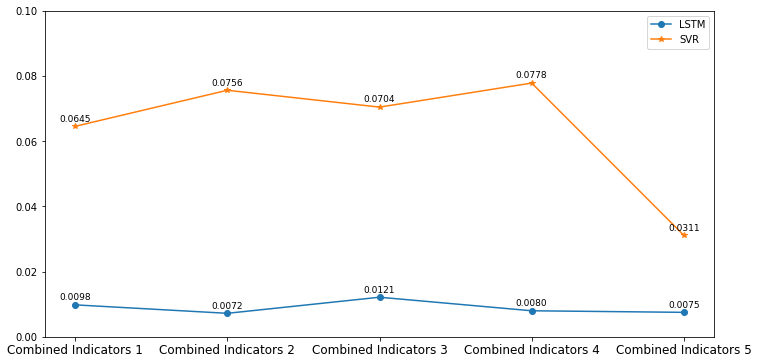

In [17]:
plt.figure(figsize=(12, 6))
xticks = ['Combined Indicators 1', 'Combined Indicators 2', 'Combined Indicators 3', 'Combined Indicators 4', 'Combined Indicators 5']
plt.plot(xticks, rmse_lstm, marker='o', label="LSTM")
plt.plot(xticks, rmse_svr, marker='*', label="SVR")
for a,b in zip(range(len(rmse_lstm)),rmse_lstm):
    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
for a,b in zip(range(len(rmse_svr)),rmse_svr):
    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
plt.xticks(fontsize=12)
plt.ylim(0, 0.1)
plt.legend()
plt.show()

In [18]:
preds_train = []
preds_test = []
rmse_lstm = []
rmse_svr = []
plt.figure(figsize=(16,16))

preds_train, preds_test = lstm_train(combined_indicators1, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = svr_train(combined_indicators1, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = lstm_train(combined_indicators2, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = svr_train(combined_indicators2, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = lstm_train(combined_indicators3, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = svr_train(combined_indicators3, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = lstm_train(combined_indicators4, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = svr_train(combined_indicators4, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = lstm_train(combined_indicators5, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_lstm.append(score(horizons_7, y_test_7, preds_test))

preds_train, preds_test = svr_train(combined_indicators5, horizons_7, X_train_7, y_train_7, X_test_7, y_test_7)
rmse_svr.append(score(horizons_7, y_test_7, preds_test))

Epoch 1/20
2452/2452 [==============================] - 25s 9ms/step - loss: 4.2506e-04
Epoch 2/20
2452/2452 [==============================] - 22s 9ms/step - loss: 1.8519e-04
Epoch 3/20
2452/2452 [==============================] - 22s 9ms/step - loss: 1.4624e-04
Epoch 4/20
2452/2452 [==============================] - 22s 9ms/step - loss: 1.2875e-04
Epoch 5/20
2452/2452 [==============================] - 22s 9ms/step - loss: 1.1475e-04
Epoch 6/20
2452/2452 [==============================] - 23s 9ms/step - loss: 9.8556e-05
Epoch 7/20
2452/2452 [==============================] - 22s 9ms/step - loss: 9.0752e-05
Epoch 8/20
2452/2452 [==============================] - 22s 9ms/step - loss: 8.2251e-05
Epoch 9/20
2452/2452 [==============================] - 22s 9ms/step - loss: 8.2326e-05
Epoch 10/20
2452/2452 [==============================] - 22s 9ms/step - loss: 8.6831e-05
Epoch 11/20
2452/2452 [==============================] - 22s 9ms/step - loss: 7.4579e-05
Epoch 12/20
2452/2452 [=======

<Figure size 1152x1152 with 0 Axes>

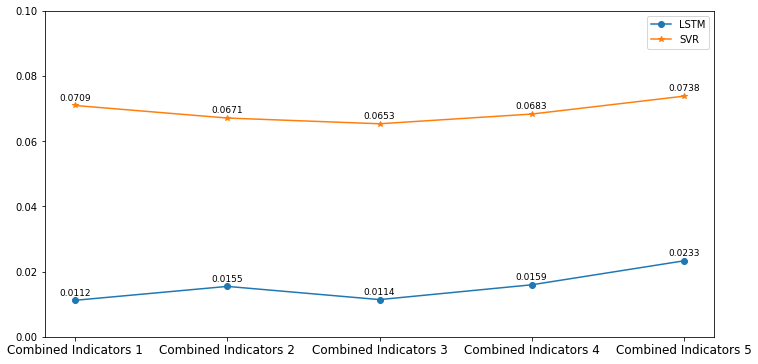

In [19]:
plt.figure(figsize=(12, 6))
xticks = ['Combined Indicators 1', 'Combined Indicators 2', 'Combined Indicators 3', 'Combined Indicators 4', 'Combined Indicators 5']
plt.plot(xticks, rmse_lstm, marker='o', label="LSTM")
plt.plot(xticks, rmse_svr, marker='*', label="SVR")
for a,b in zip(range(len(rmse_lstm)),rmse_lstm):
    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
for a,b in zip(range(len(rmse_svr)),rmse_svr):
    plt.text(a, b+0.001, '%.4f' % b, ha='center', va= 'bottom',fontsize=9)
plt.xticks(fontsize=12)
plt.ylim(0, 0.1)
plt.legend()
plt.show()